In [ ]:
#importación de librerias requeridas
import pandas as pd

#Autorización para ingresar a carpeta de Drive en caso de que se requieran cargar archivos desde esta fuente
#from google.colab import drive
#drive.mount('/content/drive')

# Se crea un path específico para facilitar la lectura de los archivos posteriormente desde google drive
#path = "/content/drive/MyDrive/Trabajo/"


#Se clona el repositorio de Github donde se encuentran los datasets fuente para ser empleados en el notebook
! git clone https://github.com/jestebanrojas/seminario.git
# Se crea un path específico para facilitar la lectura de los archivos posteriormente desde github
path = "/content/seminario/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fatal: destination path 'seminario' already exists and is not an empty directory.


# CARGAR Y PROCESAR DEMANDA HISTÓRICA

In [ ]:
#crear dataset con la información de la demanda de energía
demanda=pd.read_csv(path+'Datos/historico demanda/demanda.csv', sep=',')


#Separar la columna de fecha en varias columnas: año, mes y día, que serán empleadas posteriormente para enlazar con otras tablas
demanda['AÑO'] = pd.to_datetime(demanda['FECHA'],format = '%Y-%m-%d').dt.year
demanda['MES'] = pd.to_datetime(demanda['FECHA'],format = '%Y-%m-%d').dt.month
demanda['DIA'] = pd.to_datetime(demanda['FECHA'],format = '%Y-%m-%d').dt.day

demanda

,UCP,VARIABLE,FECHA,TIPO DIA,P1,P2,P3,P4,P5,P6,...,P22,P23,P24,TOTAL,PO19,PO20,PO21,AÑO,MES,DIA
0,UANTIOQUIA,Demanda_Real,2018-01-01,1--ENE,709.07000,671.32000,645.32000,621.37000,609.46000,625.38000,...,784.74000,714.76000,788.72000,17406.05000,0.000000,0.000000,0.000000,2018,1,1
1,UANTIOQUIA,Demanda_Real,2018-01-02,2--ENE,642.29000,584.55000,597.36000,608.16000,658.09000,723.49000,...,957.26000,855.70000,764.84000,22192.24000,0.000000,0.000000,0.000000,2018,1,2
2,UANTIOQUIA,Demanda_Real,2018-01-03,MIVENE,715.00000,689.09000,676.56000,691.08000,718.27000,806.76000,...,986.13000,919.60000,899.96000,23685.19000,0.000000,0.000000,0.000000,2018,1,3
3,UANTIOQUIA,Demanda_Real,2018-01-04,JUVENE,735.50000,697.68000,695.98000,711.07000,758.93000,820.65000,...,1046.22000,871.61000,766.75000,23743.46000,0.000000,0.000000,0.000000,2018,1,4
4,UANTIOQUIA,Demanda_Real,2018-01-05,VIVENE,726.38000,707.54000,704.45000,701.31000,727.51000,833.59000,...,976.70000,892.32000,807.87000,23769.21000,0.000000,0.000000,0.000000,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,MC-Antioquia,Demanda_Real,2023-09-26,MARTES,1003.13176,956.06731,940.56856,933.09328,991.19810,1108.90087,...,1308.89348,1174.95982,1066.55871,31041.23036,1526.565674,1519.458984,1468.997314,2023,9,26
2095,MC-Antioquia,Demanda_Real,2023-09-27,MIERCOLES,992.94030,954.61670,929.13436,933.30156,989.98395,1098.82853,...,1321.85325,1200.45704,1089.24277,31227.70493,1551.587402,1543.598633,1481.406128,2023,9,27
2096,MC-Antioquia,Demanda_Real,2023-09-28,JUEVES,1010.65388,971.70028,946.07366,944.67021,998.30398,1119.71725,...,1322.80042,1195.11186,1097.44486,31291.82978,0.390000,0.190000,0.170000,2023,9,28
2097,MC-Antioquia,Demanda_Real,2023-09-29,VIERNES,1018.90416,973.47473,949.61833,945.14775,1009.53976,1113.80251,...,1326.26979,1219.54604,1124.24605,31407.36857,1524.378296,1513.345947,1456.744995,2023,9,29


In [ ]:
#Se reemplazan textos para homogenizar los valores de la columna y que todos queden como ANTIOQUIA
demanda['UCP'] = demanda['UCP'].str.replace('UANTIOQUIA', 'ANTIOQUIA').str.replace('Uantioquia', 'ANTIOQUIA').str.replace('MC-Antioquia', 'ANTIOQUIA')
demanda

,UCP,VARIABLE,FECHA,TIPO DIA,P1,P2,P3,P4,P5,P6,...,P22,P23,P24,TOTAL,PO19,PO20,PO21,AÑO,MES,DIA
0,ANTIOQUIA,Demanda_Real,2018-01-01,1--ENE,709.07000,671.32000,645.32000,621.37000,609.46000,625.38000,...,784.74000,714.76000,788.72000,17406.05000,0.000000,0.000000,0.000000,2018,1,1
1,ANTIOQUIA,Demanda_Real,2018-01-02,2--ENE,642.29000,584.55000,597.36000,608.16000,658.09000,723.49000,...,957.26000,855.70000,764.84000,22192.24000,0.000000,0.000000,0.000000,2018,1,2
2,ANTIOQUIA,Demanda_Real,2018-01-03,MIVENE,715.00000,689.09000,676.56000,691.08000,718.27000,806.76000,...,986.13000,919.60000,899.96000,23685.19000,0.000000,0.000000,0.000000,2018,1,3
3,ANTIOQUIA,Demanda_Real,2018-01-04,JUVENE,735.50000,697.68000,695.98000,711.07000,758.93000,820.65000,...,1046.22000,871.61000,766.75000,23743.46000,0.000000,0.000000,0.000000,2018,1,4
4,ANTIOQUIA,Demanda_Real,2018-01-05,VIVENE,726.38000,707.54000,704.45000,701.31000,727.51000,833.59000,...,976.70000,892.32000,807.87000,23769.21000,0.000000,0.000000,0.000000,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,ANTIOQUIA,Demanda_Real,2023-09-26,MARTES,1003.13176,956.06731,940.56856,933.09328,991.19810,1108.90087,...,1308.89348,1174.95982,1066.55871,31041.23036,1526.565674,1519.458984,1468.997314,2023,9,26
2095,ANTIOQUIA,Demanda_Real,2023-09-27,MIERCOLES,992.94030,954.61670,929.13436,933.30156,989.98395,1098.82853,...,1321.85325,1200.45704,1089.24277,31227.70493,1551.587402,1543.598633,1481.406128,2023,9,27
2096,ANTIOQUIA,Demanda_Real,2023-09-28,JUEVES,1010.65388,971.70028,946.07366,944.67021,998.30398,1119.71725,...,1322.80042,1195.11186,1097.44486,31291.82978,0.390000,0.190000,0.170000,2023,9,28
2097,ANTIOQUIA,Demanda_Real,2023-09-29,VIERNES,1018.90416,973.47473,949.61833,945.14775,1009.53976,1113.80251,...,1326.26979,1219.54604,1124.24605,31407.36857,1524.378296,1513.345947,1456.744995,2023,9,29


In [ ]:
#Mover las columas del P1 al P24 a filas para asociar posteriormente a cada registro (año, mes, dia, hora), la información de clima, usuarios y macroeconómicos
demanda_unpivot=pd.melt(demanda, id_vars =['TIPO DIA','AÑO','MES','DIA'], value_vars =['P1', 'P2','P3','P4','P5','P6','P7','P8','P9','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24'],var_name='HORA',value_name = 'DEMANDA')

In [ ]:
demanda_unpivot

,TIPO DIA,AÑO,MES,DIA,HORA,DEMANDA
0,1--ENE,2018,1,1,P1,709.07000
1,2--ENE,2018,1,2,P1,642.29000
2,MIVENE,2018,1,3,P1,715.00000
3,JUVENE,2018,1,4,P1,735.50000
4,VIVENE,2018,1,5,P1,726.38000
...,...,...,...,...,...,...
50371,MARTES,2023,9,26,P24,1066.55871
50372,MIERCOLES,2023,9,27,P24,1089.24277
50373,JUEVES,2023,9,28,P24,1097.44486
50374,VIERNES,2023,9,29,P24,1124.24605


In [ ]:
#Se modifica la columna hora para eliminar la letra P y que inicie desde 0 hasta las 23, esto sirve para homologar el rango de horas del dia con el que se tienen en los otros datasets
demanda_unpivot['HORA'] = demanda_unpivot['HORA'].str.replace('P', '')
demanda_unpivot['HORA']=demanda_unpivot['HORA'].astype(int)-1
demanda_unpivot

,TIPO DIA,AÑO,MES,DIA,HORA,DEMANDA
0,1--ENE,2018,1,1,0,709.07000
1,2--ENE,2018,1,2,0,642.29000
2,MIVENE,2018,1,3,0,715.00000
3,JUVENE,2018,1,4,0,735.50000
4,VIVENE,2018,1,5,0,726.38000
...,...,...,...,...,...,...
50371,MARTES,2023,9,26,23,1066.55871
50372,MIERCOLES,2023,9,27,23,1089.24277
50373,JUEVES,2023,9,28,23,1097.44486
50374,VIERNES,2023,9,29,23,1124.24605


# OTRAS FUENTES


In [ ]:
#Subir csv del Dataset organizado con clima, TRM, IPC e IPP
clima_usuarios_macroec=pd.read_csv(path+'Datos/dataset_final/clima_usuarios_macro.csv', sep=',')
clima_usuarios_macroec


,YEAR,MO,DY,HR,Total Residencial,Total No Residencial,total_usuarios,ALLSKY_SFC_SW_DWN_pond,ALLSKY_KT_pond,T2M_pond,RH2M_pond,PRECTOTCORR_pond,CLRSKY_SFC_SW_DWN_pond,T2MWET_pond,Tasa de cambio representativa del mercado (TRM),IPP,IPC
0,2018,1,1,0,2131430.0,203894.0,2335324.0,0.0,-999.0,16.273810,98.030471,0.023074,0.0,16.132605,2984.00,113.31,97.52
1,2018,1,1,1,2131430.0,203894.0,2335324.0,0.0,-999.0,15.977307,98.559969,0.022980,0.0,15.869913,2984.00,113.31,97.52
2,2018,1,1,2,2131430.0,203894.0,2335324.0,0.0,-999.0,15.799837,98.537551,0.029192,0.0,15.688158,2984.00,113.31,97.52
3,2018,1,1,3,2131430.0,203894.0,2335324.0,0.0,-999.0,15.753609,97.722472,0.029183,0.0,15.576355,2984.00,113.31,97.52
4,2018,1,1,4,2131430.0,203894.0,2335324.0,0.0,-999.0,15.665025,97.384097,0.022325,0.0,15.468230,2984.00,113.31,97.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51110,2023,10,31,14,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4060.83,177.12,136.11
51111,2023,10,31,15,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4060.83,177.12,136.11
51112,2023,10,31,16,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4060.83,177.12,136.11
51113,2023,10,31,17,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4060.83,177.12,136.11


In [ ]:
#Unir el Dataframe de clima_usuarios_macros con el Dataframe de demanda y así culminar con el dataset final
demanda_unpivot = pd.merge(demanda_unpivot, clima_usuarios_macroec,  how='left', left_on=['AÑO','MES','DIA','HORA'], right_on = ['YEAR','MO','DY','HR'])
demanda_unpivot

,TIPO DIA,AÑO,MES,DIA,HORA,DEMANDA,YEAR,MO,DY,HR,...,ALLSKY_SFC_SW_DWN_pond,ALLSKY_KT_pond,T2M_pond,RH2M_pond,PRECTOTCORR_pond,CLRSKY_SFC_SW_DWN_pond,T2MWET_pond,Tasa de cambio representativa del mercado (TRM),IPP,IPC
0,1--ENE,2018,1,1,0,709.07000,2018,1,1,0,...,0.0,-999.0,16.273810,98.030471,0.023074,0.0,16.132605,2984.00,113.31,97.52
1,2--ENE,2018,1,2,0,642.29000,2018,1,2,0,...,0.0,-999.0,16.849353,98.899190,0.377386,0.0,16.766130,2984.00,113.31,97.52
2,MIVENE,2018,1,3,0,715.00000,2018,1,3,0,...,0.0,-999.0,16.224744,99.193330,0.249538,0.0,16.165059,2940.94,113.31,97.52
3,JUVENE,2018,1,4,0,735.50000,2018,1,4,0,...,0.0,-999.0,16.599071,99.390748,0.374888,0.0,16.555906,2908.68,113.31,97.52
4,VIVENE,2018,1,5,0,726.38000,2018,1,5,0,...,0.0,-999.0,16.566538,99.709886,0.109642,0.0,16.562149,2885.76,113.31,97.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50371,MARTES,2023,9,26,23,1066.55871,2023,9,26,23,...,-999.0,-999.0,18.982881,95.561722,0.651058,-999.0,18.623280,4052.54,177.12,136.11
50372,MIERCOLES,2023,9,27,23,1089.24277,2023,9,27,23,...,-999.0,-999.0,18.365609,97.205061,0.774391,-999.0,18.136743,4068.73,177.12,136.11
50373,JUEVES,2023,9,28,23,1097.44486,2023,9,28,23,...,-999.0,-999.0,18.563817,95.876753,1.068892,-999.0,18.225724,4093.60,177.12,136.11
50374,VIERNES,2023,9,29,23,1124.24605,2023,9,29,23,...,-999.0,-999.0,18.715991,98.544336,0.542070,-999.0,18.591598,4085.57,177.12,136.11


In [ ]:
print("\n -------------------- ")
print("\n -------------------- ")
print("Descripción general del dataframe final:")
print("\n -------------------- ")



demanda_unpivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50376 entries, 0 to 50375
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   TIPO DIA                                         50376 non-null  object 
 1   AÑO                                              50376 non-null  int64  
 2   MES                                              50376 non-null  int64  
 3   DIA                                              50376 non-null  int64  
 4   HORA                                             50376 non-null  int64  
 5   DEMANDA                                          50376 non-null  float64
 6   YEAR                                             50376 non-null  int64  
 7   MO                                               50376 non-null  int64  
 8   DY                                               50376 non-null  int64  
 9   HR                          

In [ ]:
#Estadísticos generales de la información del dataset

demanda_unpivot.describe()

,AÑO,MES,DIA,HORA,DEMANDA,YEAR,MO,DY,HR,Total Residencial,...,ALLSKY_SFC_SW_DWN_pond,ALLSKY_KT_pond,T2M_pond,RH2M_pond,PRECTOTCORR_pond,CLRSKY_SFC_SW_DWN_pond,T2MWET_pond,Tasa de cambio representativa del mercado (TRM),IPP,IPC
count,50376.000000,50376.000000,50376.000000,50376.000000,50376.000000,50376.000000,50376.000000,50376.000000,50376.000000,5.037600e+04,...,50376.000000,50376.000000,50376.000000,50376.000000,50376.000000,50376.000000,50376.000000,50376.000000,50376.000000,50376.000000
mean,2020.390186,6.327775,15.721772,11.500000,1085.551301,2020.390186,6.327775,15.721772,11.500000,2.332975e+06,...,149.691782,-518.167589,19.017739,87.216167,0.258948,236.640799,17.801393,3693.243273,138.468461,110.466084
std,1.660509,3.386277,8.796431,6.922255,216.524341,1.660509,3.386277,8.796431,6.922255,1.199213e+05,...,360.342743,498.627901,2.617083,13.455159,0.476545,450.513899,1.451802,551.103858,23.635095,11.133625
min,2018.000000,1.000000,1.000000,0.000000,560.450000,2018.000000,1.000000,1.000000,0.000000,2.131430e+06,...,-999.000000,-999.000000,12.270649,37.534867,0.000000,-999.000000,11.691263,2705.340000,113.310000,97.520000
25%,2019.000000,3.000000,8.000000,5.750000,894.357967,2019.000000,3.000000,8.000000,5.750000,2.230654e+06,...,0.000000,-999.000000,16.964567,77.396703,0.021473,0.000000,16.710886,3254.030000,120.190000,102.710000
50%,2020.000000,6.000000,16.000000,11.500000,1098.003415,2020.000000,6.000000,16.000000,11.500000,2.329125e+06,...,0.000000,-999.000000,18.342329,94.311955,0.102692,0.000000,17.802006,3715.280000,124.380000,105.530000
75%,2022.000000,9.000000,23.000000,17.250000,1277.465230,2022.000000,9.000000,23.000000,17.250000,2.436301e+06,...,394.900599,0.448242,20.977998,97.709659,0.306457,585.589452,18.944764,3989.410000,162.890000,117.710000
max,2023.000000,12.000000,31.000000,23.000000,2682.900965,2023.000000,12.000000,31.000000,23.000000,2.539229e+06,...,985.634841,0.772762,28.209280,99.740376,15.098715,1055.751398,21.894561,5061.210000,181.430000,136.110000


## Análisis Descriptivo de los datos

In [ ]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe
# cols     : lista de columnas a graficar
# num_cols : número de columnas
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe.
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================

# Configuración matplotlib
# ==============================================================================

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):

    plt.rcParams['figure.figsize'] = figsize

    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)

    fig, axs = plt.subplots(num_rows, num_cols)

    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols

        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 'b1':
                    sns.boxplot(data=df,x=df[col], y=df[targetVar].astype(str), ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [ ]:
#Se elimina del dataset las columnas que quedaron repetidas después del proceso de union entre datasets
demanda_unpivot=demanda_unpivot.drop(['YEAR', 'MO','DY','HR'], axis=1)

In [ ]:
#Se identifican las columnas numéricas para ser posteriormente graficadas
numCols=demanda_unpivot.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()
numCols

['AÑO',
 'MES',
 'DIA',
 'HORA',
 'DEMANDA',
 'Total Residencial',
 'Total No Residencial',
 'total_usuarios',
 'ALLSKY_SFC_SW_DWN_pond',
 'ALLSKY_KT_pond',
 'T2M_pond',
 'RH2M_pond',
 'PRECTOTCORR_pond',
 'CLRSKY_SFC_SW_DWN_pond',
 'T2MWET_pond',
 'Tasa de cambio representativa del mercado (TRM)',
 'IPP',
 'IPC']

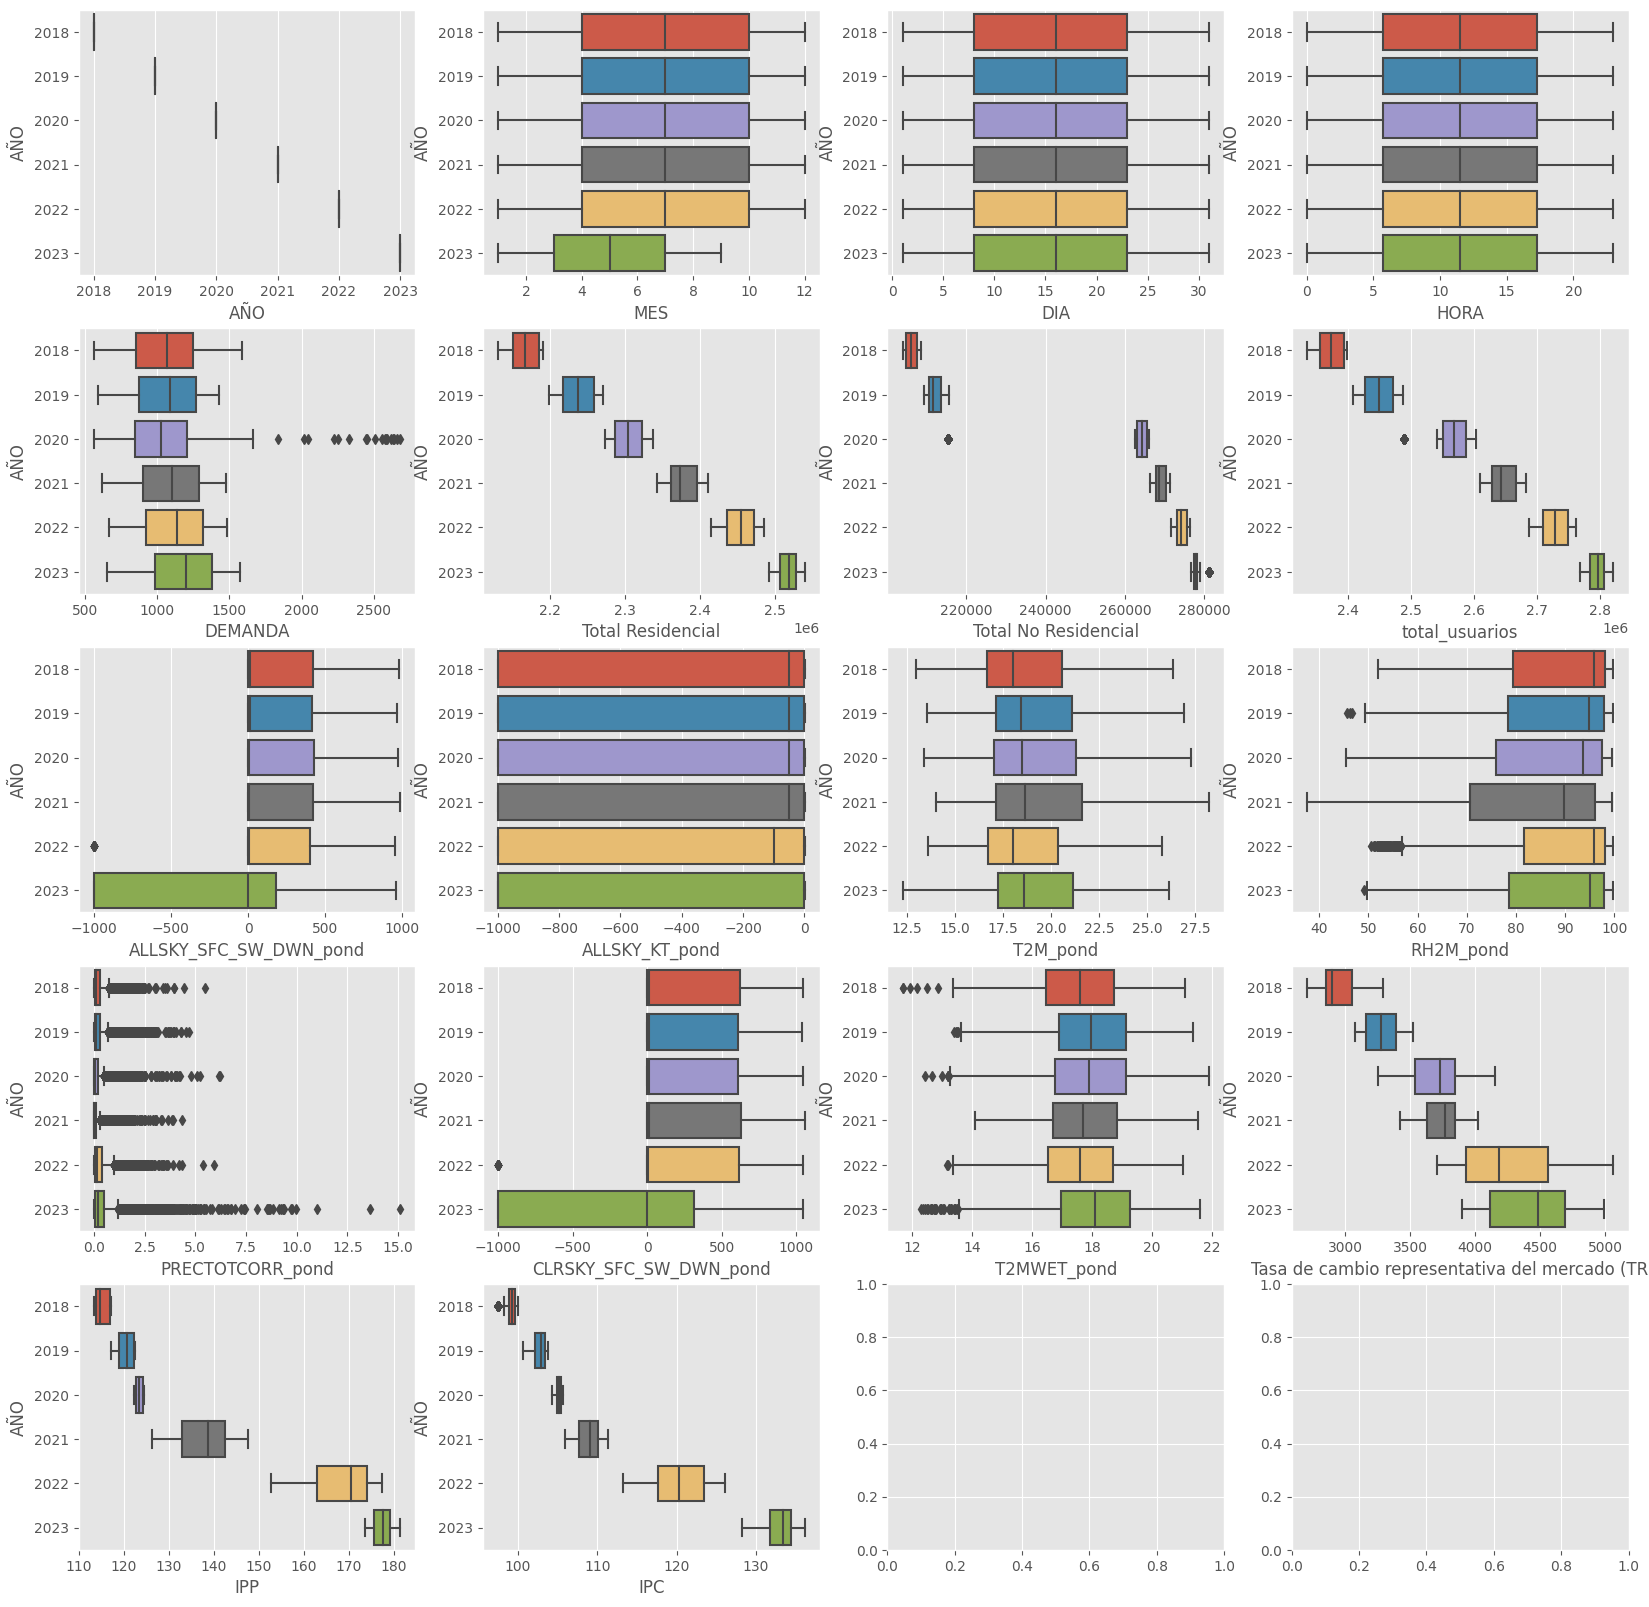

In [ ]:
#Se realiza una grafica de cajas y bigotes para cada una de las variables numéricas
# Esto con el fin de identificar el comportamiento o los rangos entre los que se encuentran los datos en cada año
print("\n -------------------- ")
print("\n -------------------- ")
print("A continuación se muestra un set de diagramas de cajas y bigotes de las diferentes variables numéricas")
print("\n -------------------- ")

plot_multiples_graficas (demanda_unpivot, numCols, 4, 5, 'b1', 'AÑO', (20,20))

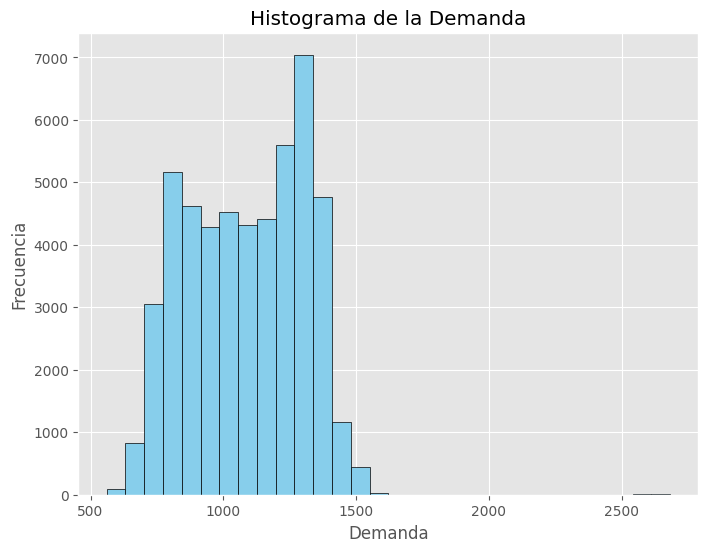

In [ ]:
"""Se realizará un histograma de frecuencia con la información de la demanda horaria para conocer su comportamiento"""
print("\n -------------------- ")
print("\n -------------------- ")
print("A continuación se grafica el histograma de frecuencia con la información de la demanda horaria para conocer su comportamiento")
print("\n -------------------- ")


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(demanda_unpivot['DEMANDA'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de la Demanda')
plt.xlabel('Demanda')
plt.ylabel('Frecuencia')
plt.show()

DEl histrograma se aprecia que no tienen una distribución normal, y que existen valores atípicos que son superiores a 2000, los cuales deberán ser tratados posteriormente.

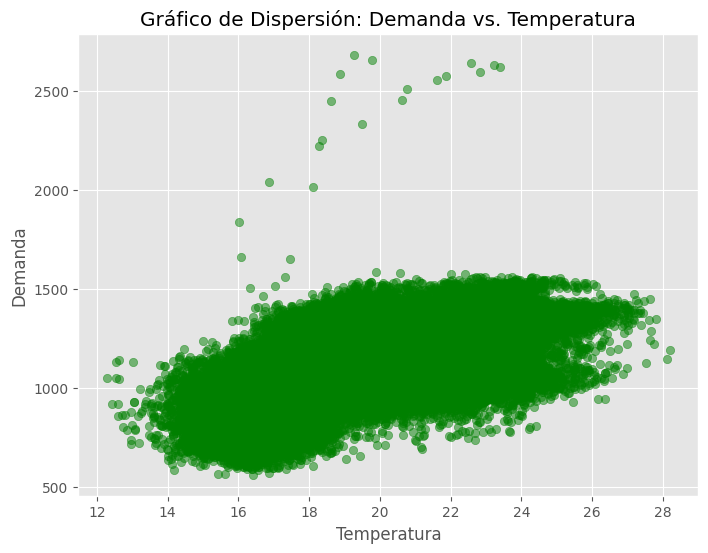

In [ ]:
"""Se realizará un diagrama de dispersión entre la demanda horaria y la temperatura y conocer si existe alguna posble correlación entre ambas"""
print("\n -------------------- ")
print("\n -------------------- ")
print("A continuación se grafica el diagrama de dispersión entre la demanda horaria y la temperatura y conocer si existe alguna posble correlación entre ambas")
print("\n -------------------- ")


plt.figure(figsize=(8, 6))
plt.scatter(demanda_unpivot['T2M_pond'], demanda_unpivot['DEMANDA'], alpha=0.5, color='green')
plt.title('Gráfico de Dispersión: Demanda vs. Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Demanda')
plt.show()

In [ ]:
#Lista de variables numéricas

numCols=demanda_unpivot.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

demanda_unpivot[numCols].head()

,AÑO,MES,DIA,HORA,DEMANDA,Total Residencial,Total No Residencial,total_usuarios,ALLSKY_SFC_SW_DWN_pond,ALLSKY_KT_pond,T2M_pond,RH2M_pond,PRECTOTCORR_pond,CLRSKY_SFC_SW_DWN_pond,T2MWET_pond,Tasa de cambio representativa del mercado (TRM),IPP,IPC
0,2018,1,1,0,709.07,2131430.0,203894.0,2335324.0,0.0,-999.0,16.273810,98.030471,0.023074,0.0,16.132605,2984.00,113.31,97.52
1,2018,1,2,0,642.29,2131430.0,203894.0,2335324.0,0.0,-999.0,16.849353,98.899190,0.377386,0.0,16.766130,2984.00,113.31,97.52
2,2018,1,3,0,715.00,2131430.0,203894.0,2335324.0,0.0,-999.0,16.224744,99.193330,0.249538,0.0,16.165059,2940.94,113.31,97.52
3,2018,1,4,0,735.50,2131430.0,203894.0,2335324.0,0.0,-999.0,16.599071,99.390748,0.374888,0.0,16.555906,2908.68,113.31,97.52
4,2018,1,5,0,726.38,2131430.0,203894.0,2335324.0,0.0,-999.0,16.566538,99.709886,0.109642,0.0,16.562149,2885.76,113.31,97.52


In [ ]:
#sns.pairplot(demanda_unpivot[numCols])

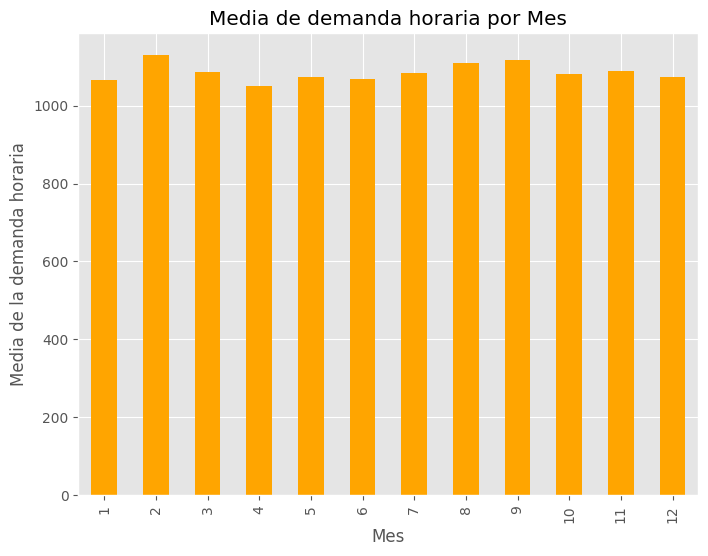

In [ ]:
print("\n -------------------- ")
print("\n -------------------- ")
print("A continuación se grafica la media mensual de la demanda horaria")
print("\n -------------------- ")


plt.figure(figsize=(8, 6))
mean_demand_by_month = demanda_unpivot.groupby('MES')['DEMANDA'].mean()
mean_demand_by_month.plot(kind='bar', color='orange')



plt.title('Media de demanda horaria por Mes')
plt.xlabel('Mes')
plt.ylabel('Media de la demanda horaria')
plt.show()

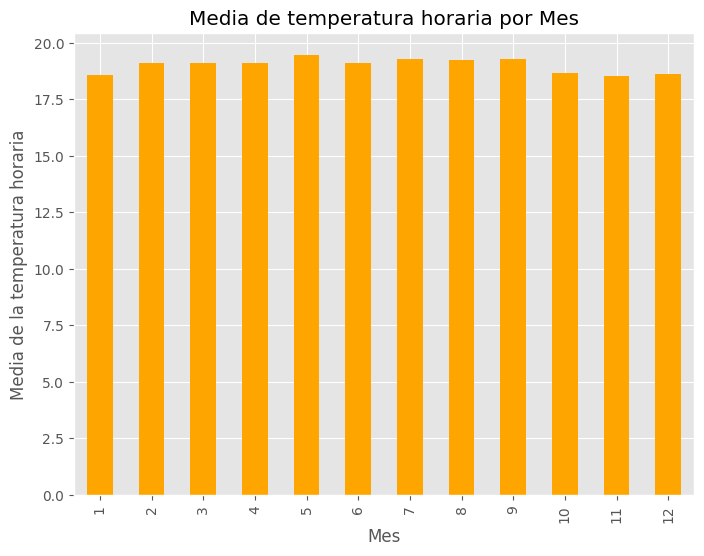

In [ ]:
print("\n -------------------- ")
print("\n -------------------- ")
print("A continuación se grafica la media mensual de la temperatura horaria")
print("\n -------------------- ")


plt.figure(figsize=(8, 6))
mean_temp_by_month = demanda_unpivot.groupby('MES')['T2M_pond'].mean()
mean_temp_by_month.plot(kind='bar', color='orange')


plt.title('Media de temperatura horaria por Mes')
plt.xlabel('Mes')
plt.ylabel('Media de la temperatura horaria')
plt.show()

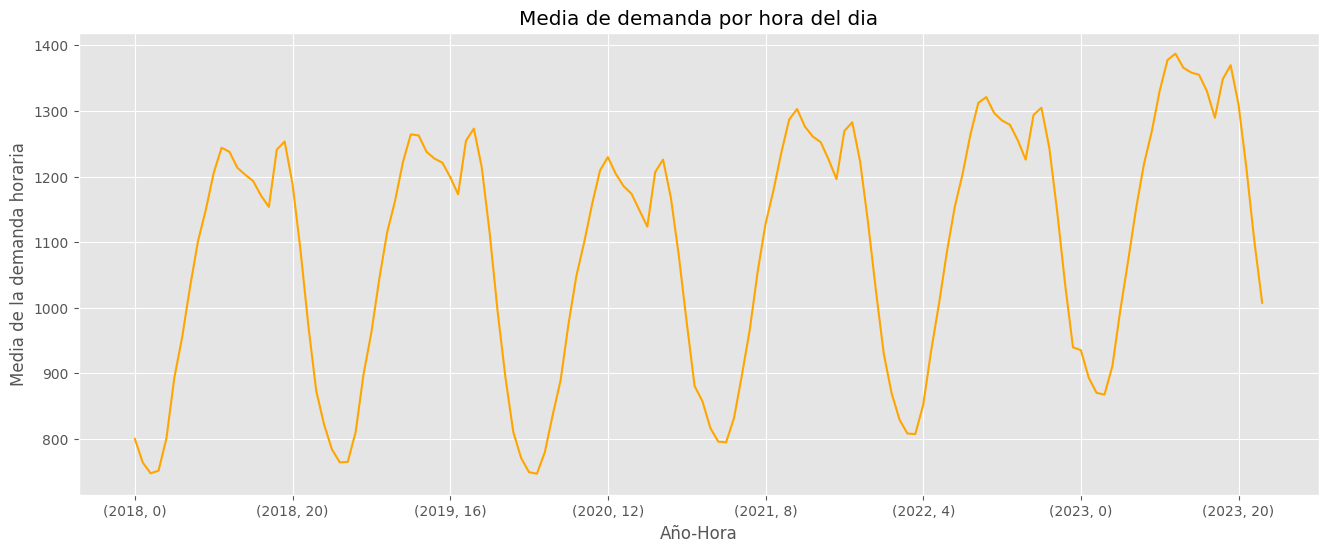

In [ ]:
print("\n -------------------- ")
print("\n -------------------- ")
print("A continuación se grafica la media de la demanda horaria de cada año")
print("\n -------------------- ")


plt.figure(figsize=(16, 6))
mean_demand_by_hour = demanda_unpivot.groupby(['AÑO', 'HORA'])['DEMANDA'].mean()
mean_demand_by_hour.plot(kind='line', color='orange')

#mean_temp_by_hour = demanda_unpivot.groupby(['AÑO', 'HORA'])['T2M_pond'].mean()
#mean_temp_by_hour.plot(kind='line', color='orange')

plt.title('Media de demanda por hora del dia')
plt.xlabel('Año-Hora')
plt.ylabel('Media de la demanda horaria')
plt.show()






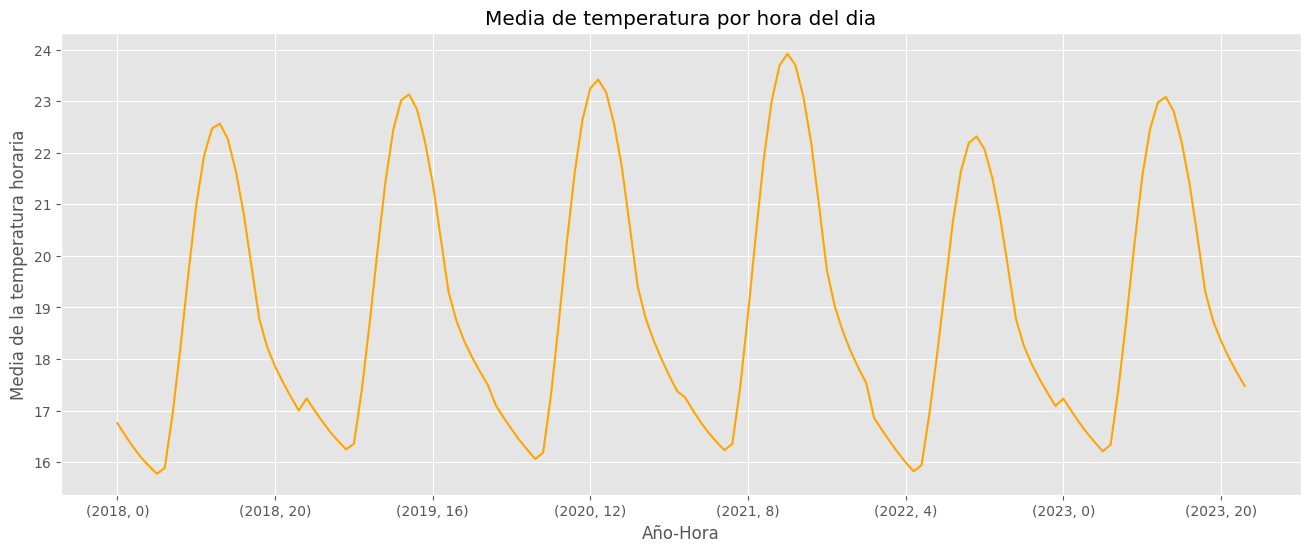

In [ ]:
print("\n -------------------- ")
print("\n -------------------- ")
print("A continuación se grafica la media de la temperatura horaria de cada año")
print("\n -------------------- ")


plt.figure(figsize=(16, 6))
mean_demand_by_hour = demanda_unpivot.groupby(['AÑO', 'HORA'])['T2M_pond'].mean()
mean_demand_by_hour.plot(kind='line', color='orange')

#mean_temp_by_hour = demanda_unpivot.groupby(['AÑO', 'HORA'])['T2M_pond'].mean()
#mean_temp_by_hour.plot(kind='line', color='orange')

plt.title('Media de temperatura por hora del dia')
plt.xlabel('Año-Hora')
plt.ylabel('Media de la temperatura horaria')
plt.show()

In [ ]:
#Construir una columna tipo datetime apartir de las columnas AÑO, MES, DIA, HORA
demanda_unpivot['FECHA'] = pd.to_datetime(dict(year=demanda_unpivot['AÑO'], month=demanda_unpivot['MES'], day=demanda_unpivot['DIA']))

#define index column
#demanda_unpivot.set_index('HORA', inplace=True)

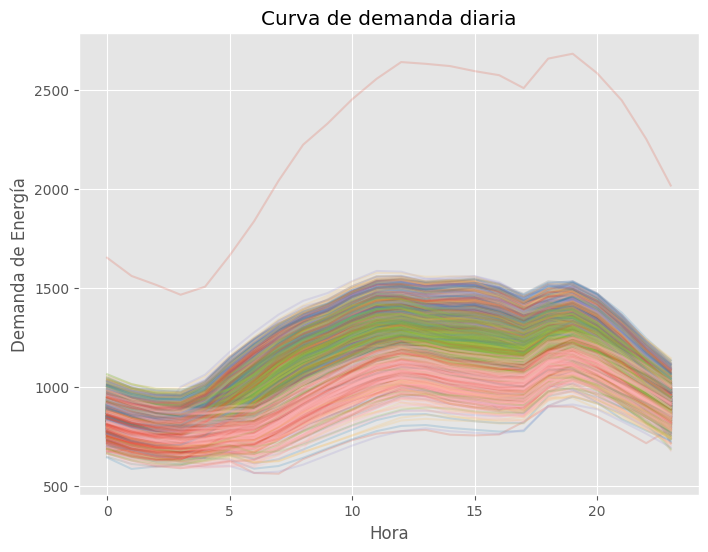

In [ ]:
# Graficar las curva de demanda horaria para todo los deias del periodo de tiempo
print("\n -------------------- ")
print("\n -------------------- ")
print("Se Grafica a continuación las curva de demanda horaria para todo los deias del periodo de tiempo")
print("\n -------------------- ")


fig, ax = plt.subplots(figsize=(8, 6))
#Recorrer el conjunto de datos a partir de la agrupación por día
for name, group in demanda_unpivot.groupby('FECHA')['DEMANDA']:
    ax.plot(group.to_frame().reset_index().index, group.to_frame().reset_index().DEMANDA, alpha=0.2, lw=1.5)


plt.title('Curva de demanda diaria')
plt.xlabel('Hora')
plt.ylabel('Demanda de Energía')
plt.show()

In [ ]:
#Verificar si existe directorio en el entorno
import os
path = "Datasets_salida/dataset_final/"
# verificación de si existe o no el directorio
isExist = os.path.exists(path)
if not isExist:

   # Ccrea el directorio cuando no existe
   os.makedirs(path)
   print("\n -------------------- ")
   print("\n -------------------- ")
   print("se creó el directorio: ", path)
   print("\n -------------------- ")


#Descargar en la carpeta de drive este ultimo Dataset en csv con la información final
#demanda_unpivot.to_csv('/content/drive/MyDrive/Trabajo/Datasets_salida/dataset_final/dataset_demada_Antioquia.csv', index=False)

demanda_unpivot.to_csv('/content/Datasets_salida/dataset_final/dataset_demada_Antioquia.csv', index=False)

print("\n -------------------- ")
print("\n -------------------- ")
print("se creó el archivo: dataset_demada_Antioquia.csv")